Name: Nancy Sui

Date: 8/1/2024

Title:  Olympic Evolution: Exploring Trends in National Dominance, Gender Representation, and Home Advantage

Class: UCLA DH 140 

# Olympic Evolution: Exploring Trends in National Dominance, Gender Representation, and Home Advantage
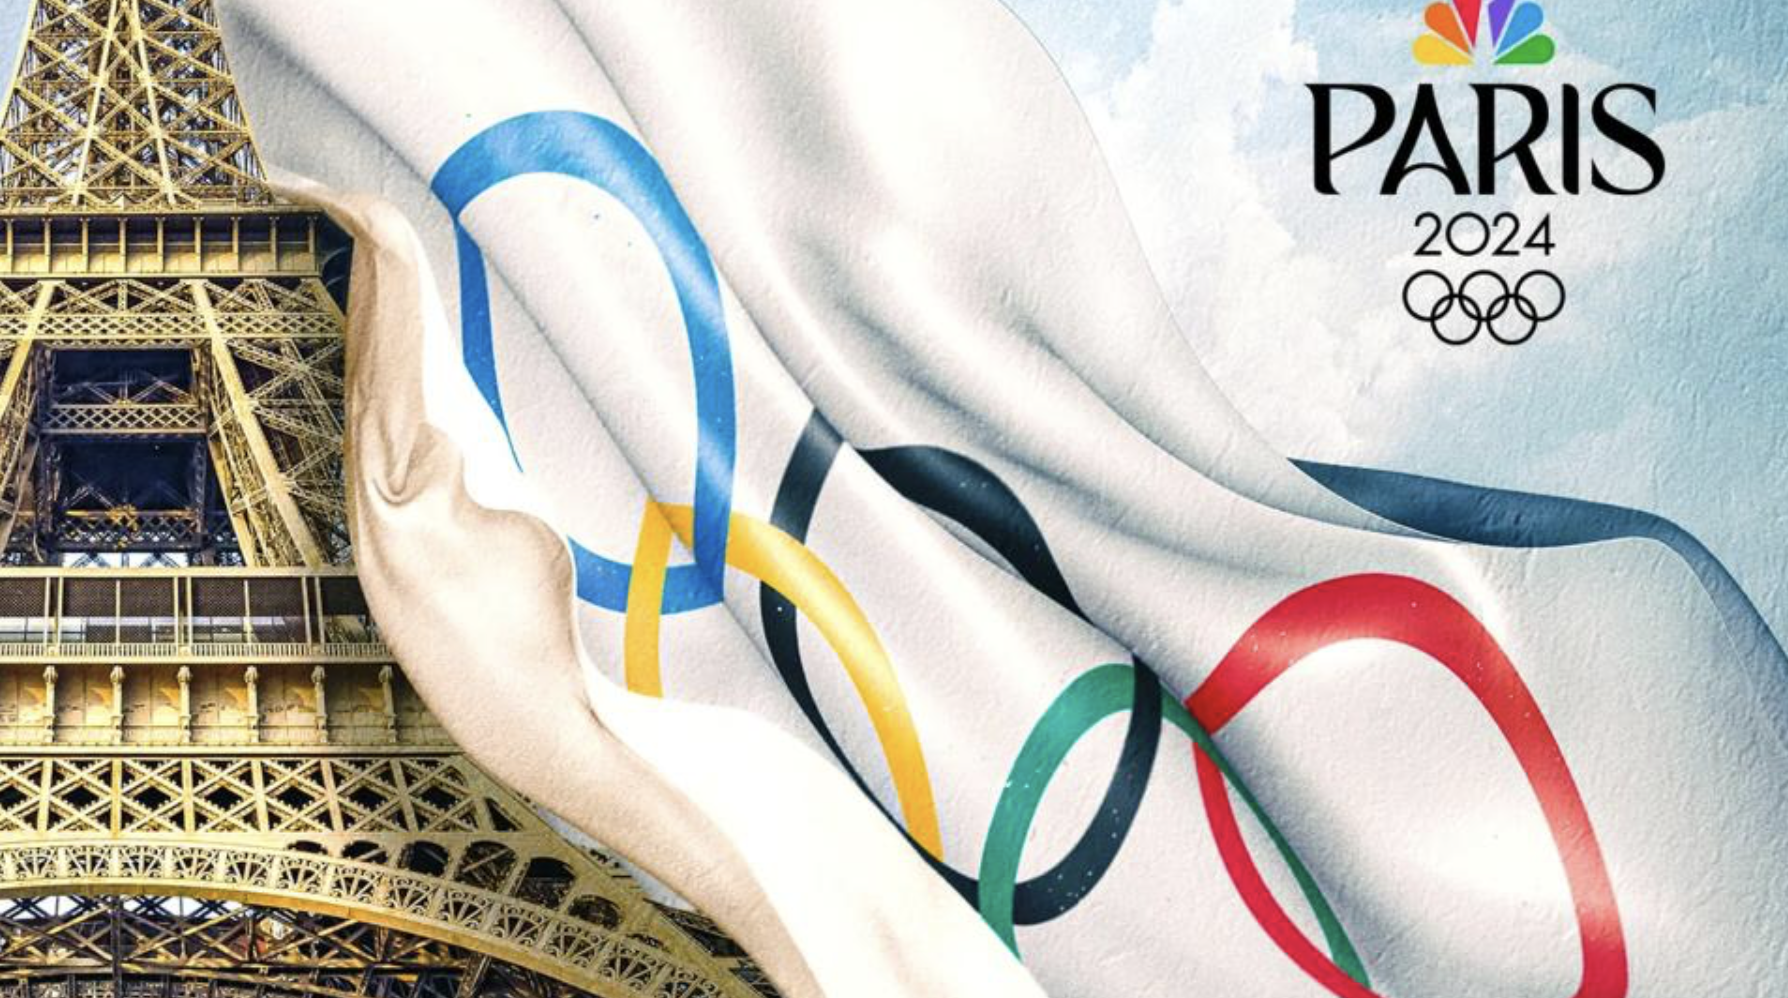


Photo Credit: NBCUniversal
https://www.nbcuniversal.com/article/more-150-commentators-join-nbcuniversals-coverage-olympic-games-paris-2024

## Introduction
The 2024 Paris Olympics, the most anticipated global event of this summer, has brought a renewed focus on the dynamics that shape the world of sports. This project examines the evolution of women's representation in the Olympics, highlighting the progress made toward gender equality. Additionally, the concept of "home advantage" is analyzed to determine its impact on medal counts for host countries. Finally, this study analyzes the dominance of countries in the Olympics and the sports they excel in, providing insights into the factors contributing to success.

### Dataset Description 
| Dataset Name                             | Description                                                                                                                                                         | Link to Resources                                                                 |
|------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------|
| 120 Years of Olympic History: Athletes and Results | This dataset contains detailed information about athletes and their results in the Olympics from 1896 to 2016. It includes variables such as ID, Name, Sex, Age, Height, Weight, Team, NOC, Games, Year, Season, City, Sport, Event, and Medal. | [Kaggle: 120 Years of Olympic History](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results) |
| Country Wise GDP Data                    | This dataset provides information on the Gross Domestic Product (GDP) of various countries. It includes variables such as Country, Year, and GDP in USD.            | [Kaggle: Country GDP Data](https://www.kaggle.com/datasets/chadalee/country-wise-gdp-data)                        |



### Research Questions
1. How has the representation of women in the Olympics changed over the decades?
2. What is the impact of home advantage on Olympic medal counts?
3. Which countries have historically dominated which sports in Olympics?

### Motivation 
The 2024 Paris Olympics, capturing global attention this summer, provides a compelling backdrop for examining the intersection of sports and digital humanities. This project aims to explore the evolving representation of women in sports through digital analysis and assess the impact of home advantage on medal counts. By leveraging digital tools and computational techniques, this research not only highlights the dynamic nature of the Games but also demonstrates how digital humanities can enhance our understanding of socio-economic and cultural phenomena in global sports.

### Methods
- Data Preprocessing
  1. Import Data
  2. Cleaning
  3. Merging 
  
- Data Analysis
   1. Basic statistical analysis
  
  
- Data Visualization 
  1. Insights
  2. Comparsion 

## Data Preprocessing

### Import All Necessary Library

In [144]:

import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px


%matplotlib inline  


In [146]:

# Read in the data set
data=pd.read_csv("~/Desktop/athlete_events.csv", encoding='latin1') # fix UnicodeDecodeErro
data.head()



ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

### Data Analysis: Describing data with std,mean,min,max

In [148]:

data.describe().T

count          mean           std     min      25%      50%  \
ID      271116.0  68248.954396  39022.286345     1.0  34643.0  68205.0   
Age     261642.0     25.556898      6.393561    10.0     21.0     24.0   
Height  210945.0    175.338970     10.518462   127.0    168.0    175.0   
Weight  208241.0     70.702393     14.348020    25.0     60.0     70.0   
Year    271116.0   1978.378480     29.877632  1896.0   1960.0   1988.0   

              75%       max  
ID      102097.25  135571.0  
Age         28.00      97.0  
Height     183.00     226.0  
Weight      79.00     214.0  
Year      2002.00    2016.0

In [149]:

data.isnull().sum()/data.shape[0]

ID        0.000000
Name      0.000000
Sex       0.000000
Age       0.034944
Height    0.221938
Weight    0.231912
Team      0.000000
NOC       0.000000
Games     0.000000
Year      0.000000
Season    0.000000
City      0.000000
Sport     0.000000
Event     0.000000
Medal     0.853262
dtype: float64

Medal is larger than 0.5, we will discuss it later.

In [154]:
noc_data= pd.read_csv("~/Desktop/noc_regions.csv", encoding='latin1')

noc_data.drop('notes', axis = 1 , inplace = True)
noc_data.rename(columns = {'region':'Country'}, inplace = True)
noc_data.head()


NOC      Country
0  AFG  Afghanistan
1  AHO      Curacao
2  ALB      Albania
3  ALG      Algeria
4  AND      Andorra

### Data Cleaning

In [157]:
print(data.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


The Age, Height, and Weight columns contain a significant number of missing values. The Medal column also has missing values, which is expected as it is only absent for participants who did not win a medal.

In [160]:
# Now replace the missing values of Medal with 'NA'
data['Medal'].fillna('NA', inplace = True)
print(data.isnull().sum()) # check it again 

ID            0
Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64


### Merge Data 

In [163]:

df=data.merge(noc_data,left_on='NOC', right_on='NOC',how='left')
df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal      Country  
0       Basketball Men's Basketball    NA        China  
1      Judo Men's Extra-Lightweight    NA        China  
2           Football Men's Football    NA      Denmark  
3       Tug-Of-War Men's Tug-Of-War  Gold      Denmark  
4  Speed Skating Women's 500 metres    NA  Netherlands

# Methods

Create a bar plot using Seaborn to visualize how many women won medals each year in the Summer Olympics

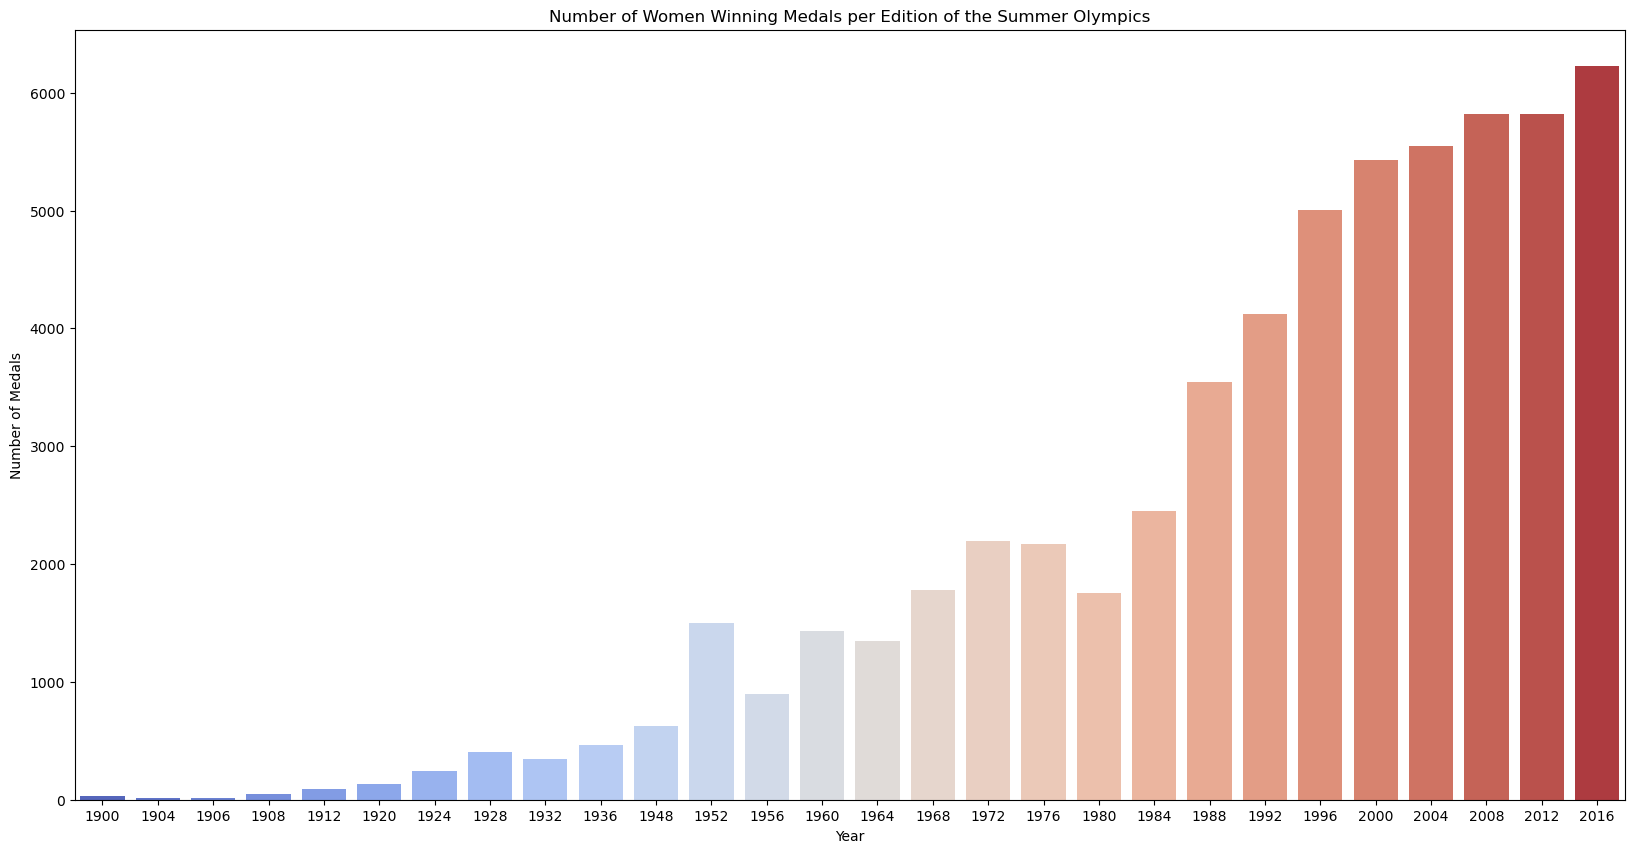

In [167]:
# female participants in the Summer Olympics
women_olympics = df[(df['Sex'] == 'F') & (df['Season'] == 'Summer') & (df['Medal'].notnull())]


plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=women_olympics, palette='coolwarm')

# Add title 
plt.title('Number of Women Winning Medals per Edition of the Summer Olympics')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.show()

Show trends of numbers of Male and Female Participants by each year

<Figure size 2000x1000 with 0 Axes>

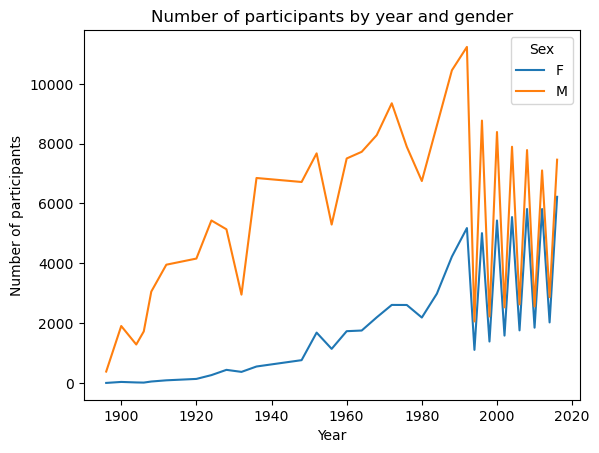

In [170]:

year_sex_medal = df.groupby(['Year', 'Sex']).size().reset_index(name='Medal')

year_sex_medal_pivot=year_sex_medal.pivot(index='Year', columns='Sex', values='Medal').fillna(0)

plt.figure(figsize=(20, 10))
fig=plt.gcf()
year_sex_medal_pivot.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number of participants')
plt.title('Number of participants by year and gender')
plt.show()

Observations:

Initial Gap: The graph shows a significant gap between the number of male and female participants in the earlier decades of the Olympics. Historically, the participation of women in the Olympics was minimal.


Recent Trends: In recent decades, the gap between the number of male and female participants has been narrowing. This trend highlights the progress towards gender equality in sports, with more events being made available to female athletes and increased efforts to promote women's participation in the Olympics.

### Home Advantage

In [174]:
# Correct city names in the dataset
df['City'].replace(['Athina', 'Moskva'], ['Athens', 'Moscow'], inplace=True)

# Mapping city to its host country
city_to_country = {
    'Tokyo': 'Japan', 'Mexico City': 'Mexico', 'Munich': 'Germany', 'Montreal': 'Canada',
    'Moscow': 'Russia', 'Los Angeles': 'USA', 'Seoul': 'South Korea', 'Barcelona': 'Spain',
    'Atlanta': 'USA', 'Sydney': 'Australia', 'Athens': 'Greece', 'Beijing': 'China',
    'London': 'UK', 'Rio de Janeiro': 'Brazil'
}


df['Country_Host'] = df['City'].map(city_to_country)


olympics_complete_subset = df[['Year', 'Country_Host', 'Team', 'Medal']].drop_duplicates()

# find year, host nation and team name
year_host_team = olympics_complete_subset[['Year', 'Country_Host', 'Team']].drop_duplicates()

# check  if rows where host country is the same as team
row_mask_4 = (year_host_team['Country_Host'] == year_host_team['Team'])

# Add years to show one previous and one later year
year_host_team['Prev_Year'] = year_host_team['Year'] - 4
year_host_team['Next_Year'] = year_host_team['Year'] + 4

#  only if where host nation and team were the same
year_host_team = year_host_team[row_mask_4]


In [176]:
# 
medal_tally = df.groupby(['Year', 'Team'])['Medal'].count().reset_index().rename(columns={'Medal': 'Medal_Won_Corrected'})

year_host_team_medal = year_host_team.merge(medal_tally, left_on=['Year', 'Team'], right_on=['Year', 'Team'], how='left')
year_host_team_medal.rename(columns={'Medal_Won_Corrected': 'Medal_Won_Host_Year'}, inplace=True)

# Calculate medals won by team in previous year
year_host_team_medal = year_host_team_medal.merge(medal_tally, left_on=['Prev_Year', 'Team'], right_on=['Year', 'Team'], how='left')
year_host_team_medal.drop('Year_y', axis=1, inplace=True)
year_host_team_medal.rename(columns={'Medal_Won_Corrected': 'Medal_Won_Prev_Year', 'Year_x': 'Year'}, inplace=True)

# Calculate the medals won by the team the year after they hosted
year_host_team_medal = year_host_team_medal.merge(medal_tally, left_on=['Next_Year', 'Team'], right_on=['Year', 'Team'], how='left')
year_host_team_medal.drop('Year_y', axis=1, inplace=True)
year_host_team_medal.rename(columns={'Medal_Won_Corrected': 'Medal_Won_Next_Year', 'Year_x': 'Year'}, inplace=True)


year_host_team_medal.drop(['Prev_Year', 'Next_Year'], axis=1, inplace=True)
year_host_team_medal.sort_values('Year', ascending=True, inplace=True)
year_host_team_medal.reset_index(inplace=True, drop=True)

#re-ordering
year_host_team_medal = year_host_team_medal[['Year', 'Country_Host', 'Team', 'Medal_Won_Prev_Year', 'Medal_Won_Host_Year', 'Medal_Won_Next_Year']]
year_host_team_medal.dropna(subset=['Medal_Won_Host_Year'], inplace=True)

# Display the result
year_host_team_medal


Year Country_Host         Team  Medal_Won_Prev_Year  Medal_Won_Host_Year  \
0   1896       Greece       Greece                  NaN                  140   
1   1906       Greece       Greece                  NaN                  318   
2   1964        Japan        Japan                346.0                  531   
3   1968       Mexico       Mexico                118.0                  446   
4   1976       Canada       Canada                421.0                  620   
5   1988  South Korea  South Korea                278.0                  603   
6   1992        Spain        Spain                346.0                  582   
7   2000    Australia    Australia                542.0                  762   
8   2004       Greece       Greece                175.0                  495   
9   2008        China        China                490.0                  708   
10  2016       Brazil       Brazil                294.0                  571   

    Medal_Won_Next_Year  
0                   4.0  
1                   NaN  
2                 384.0  
3                 281.0  
4                  82.0  
5                 363.0  
6                 380.0  
7                 585.0  
8                 172.0  
9                 463.0  
10                  NaN

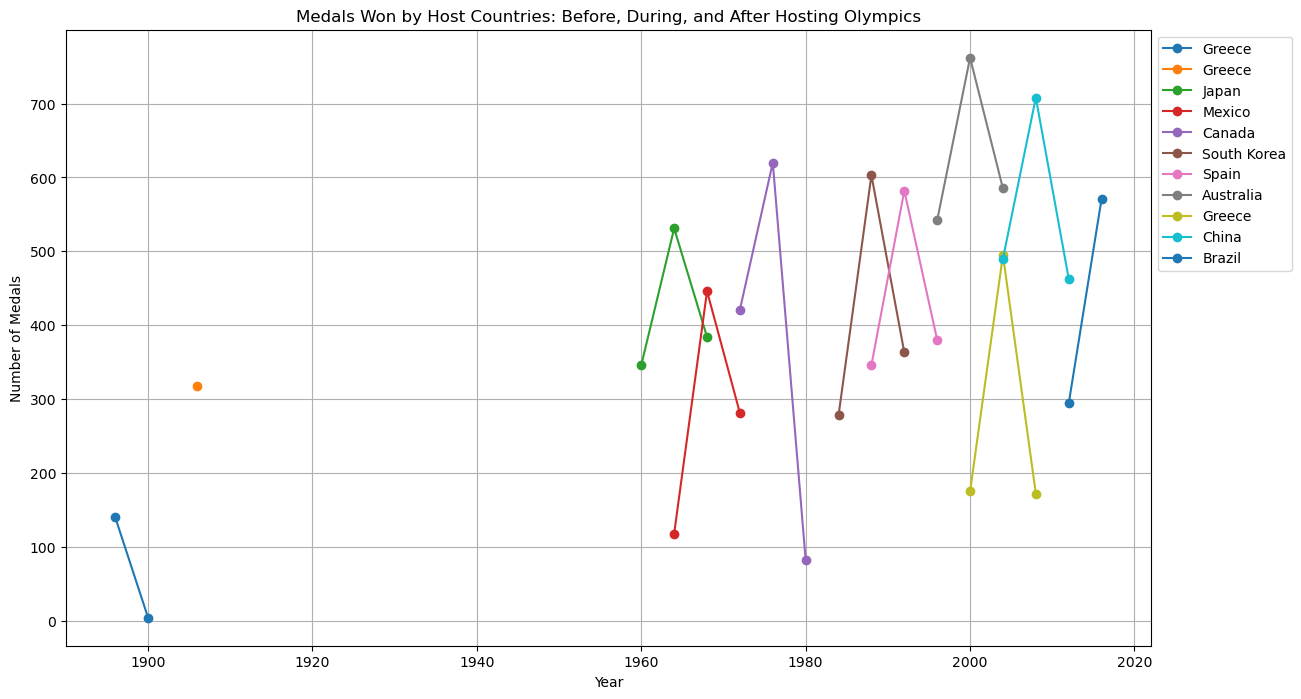

In [178]:
# Create a bar plot to visualize the medals won before, during, and after hosting the Olympics

plt.figure(figsize=(14, 8))
for index, row in year_host_team_medal.iterrows():
    plt.plot([row['Year']-4, row['Year'], row['Year']+4],
             [row['Medal_Won_Prev_Year'], row['Medal_Won_Host_Year'], row['Medal_Won_Next_Year']],
             marker='o', label=row['Country_Host'])

plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('Medals Won by Host Countries: Before, During, and After Hosting Olympics')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


Analyze the dominance of countries in the Olympics and the sports they excel in

In [181]:
# Calculate the total number of medals won by each country
total_medals = df[df['Medal'] != 'NA'].groupby('Country')['Medal'].count().reset_index()
total_medals = total_medals.sort_values(by='Medal', ascending=False).reset_index(drop=True)

# Display the top 10 countries
top_countries = total_medals.head(10)
top_countries


Country  Medal
0        USA   5637
1     Russia   3947
2    Germany   3756
3         UK   2068
4     France   1777
5      Italy   1637
6     Sweden   1536
7     Canada   1352
8  Australia   1349
9    Hungary   1135

In [183]:
# include only the first country 
top_countries_list = top_countries['Country'].tolist()
df_top_countries = df[df['Country'].isin(top_countries_list) & (df['Medal'] != 'NA')]

# Calculate the total number of medals for each country 
country_sport_medals = df_top_countries.groupby(['Country', 'Sport'])['Medal'].count().reset_index()

# sorting medals in descending order and picking the top entry for each country 
top_sport_per_country = country_sport_medals.sort_values('Medal', ascending=False).groupby('Country').head(1).reset_index(drop=True)

# Sort the top sports for each country by the number of medals in descending order to rank them
top_sport_per_country = top_sport_per_country.sort_values('Medal', ascending=False).reset_index(drop=True)

#show result
top_sport_per_country.head(10)


Country       Sport  Medal
0        USA   Athletics   1080
1    Germany      Rowing    471
2  Australia    Swimming    412
3     Russia  Gymnastics    399
4      Italy     Fencing    359
5     Canada  Ice Hockey    348
6         UK   Athletics    338
7     France     Fencing    310
8    Hungary     Fencing    236
9     Sweden  Ice Hockey    217

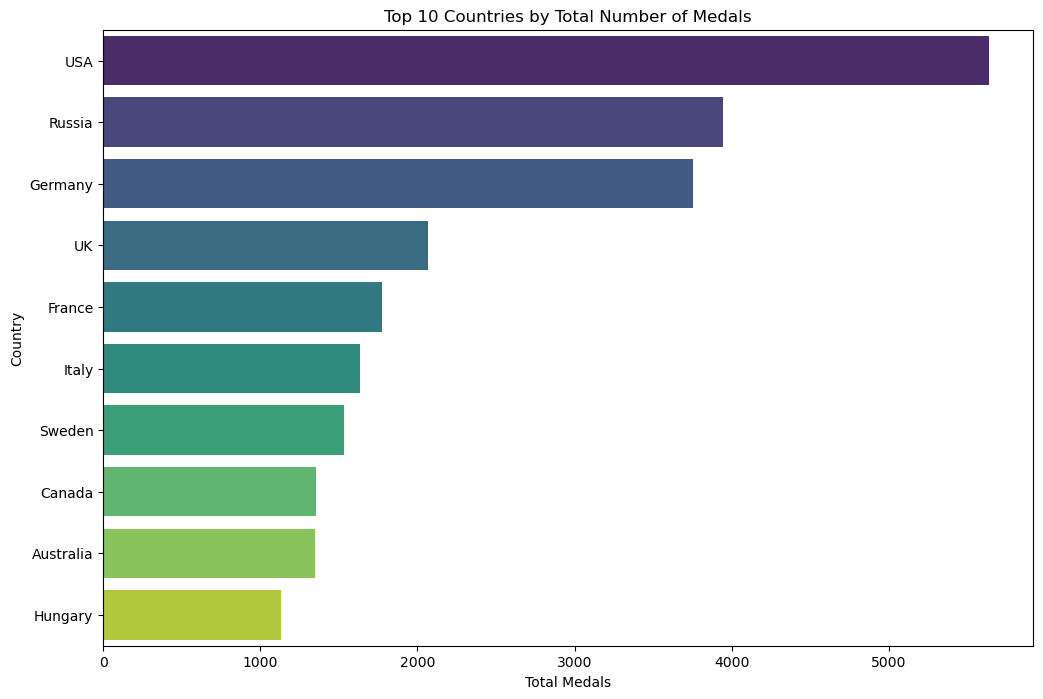

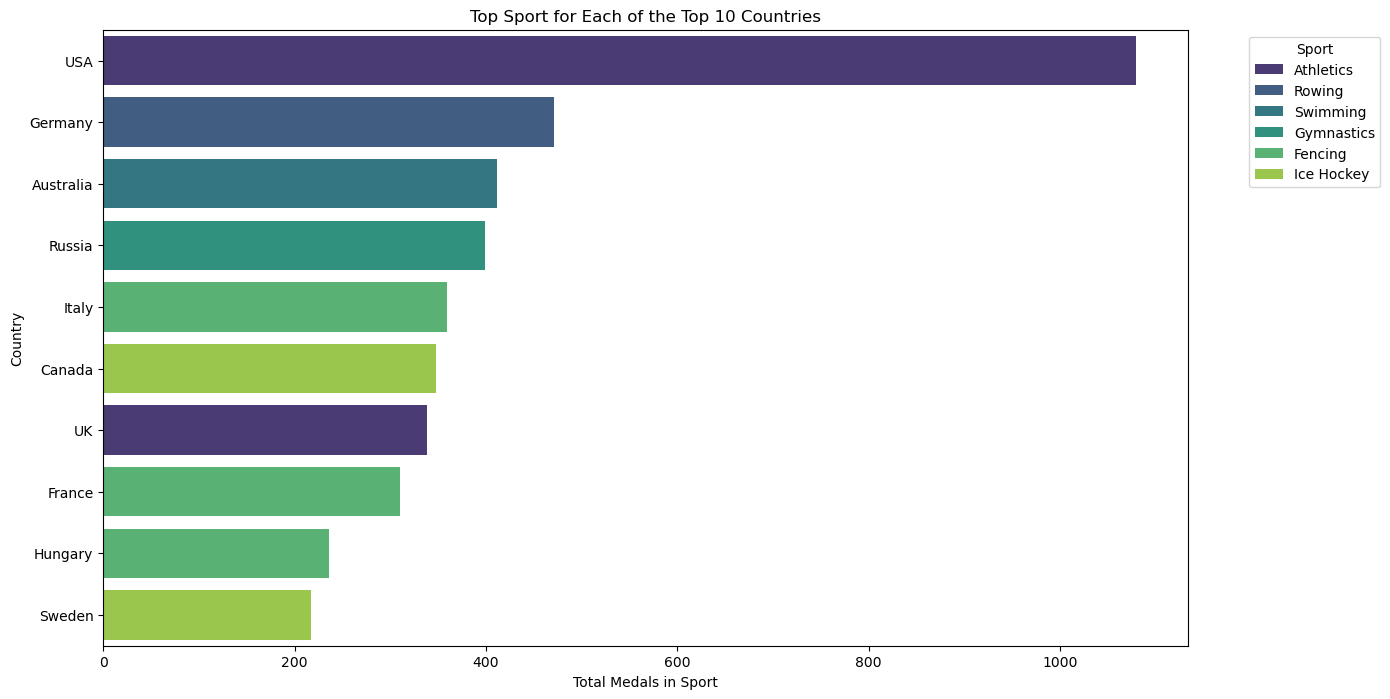

In [185]:


# Plot the total number of medals won by the top countries
plt.figure(figsize=(12, 8))
sns.barplot(data=top_countries, x='Medal', y='Country', palette='viridis')
plt.title('Top 10 Countries by Total Number of Medals')
plt.xlabel('Total Medals')
plt.ylabel('Country')
plt.show()

# Plot the top sport for each of the top countries
plt.figure(figsize=(14, 8))
sns.barplot(data=top_sport_per_country, x='Medal', y='Country', hue='Sport', dodge=False, palette='viridis')
plt.title('Top Sport for Each of the Top 10 Countries')
plt.xlabel('Total Medals in Sport')
plt.ylabel('Country')
plt.legend(title='Sport', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Results:

Key Findings

Gender Representation:
The analysis revealed a substantial gap between male and female participants in the early years of the Olympics. However, this gap has narrowed significantly in recent decades.
Key milestones, such as the introduction of Title IX in the United States and the establishment of the Women's Sports Foundation, correlate with notable increases in female participation.

National Dominance:
The early 20th century was dominated by the United States and Great Britain, as shown in the medal counts.
The mid-20th century saw the rise of the Soviet Union and Eastern Bloc countries, which invested heavily in sports programs.
In recent decades, China has emerged as a dominant force, particularly since the 2008 Beijing Olympics, reflecting its substantial investment in sports infrastructure and athlete development.
The analysis of the top sports for each country revealed strategic focuses, with the United States excelling in track and field, swimming, and gymnastics, while China has shown strength in diving, gymnastics, and weightlifting.

Home Country Advantage:
Hosting the Olympics has a noticeable impact on a country's medal count. Host countries typically see a spike in medals won during the year they host the Games.
The data for countries like the United States (1984), China (2008), and Great Britain (2012) illustrate this trend, highlighting the benefits of competing at home country.

# Discussion:

The Olympic Games, which began in Athens in 1896 with the first modern-era Games, provide a rich context for analyzing changes in national dominance, gender representation, and the impact of economic factors on global sports performance. Over more than 120 years, these Games have evolved significantly, revealing insights into how various factors have influenced Olympic success and shaped the competitive landscape. This extensive analysis of Olympic history highlights the shifting dynamics that define the Games and offers a deeper understanding of the forces at play in shaping athletic achievements on the world stage.


Gender Representation in the Olympics

Gender representation in the Olympics has evolved significantly since the inception of the modern Games in 1896. Initially, the participation of women in the Olympics was minimal, with only a few events available to female athletes. The early 20th century saw a gradual expansion of women's roles, but meaningful inclusion and equality remained limited for several decades.

In the early years, the Olympics were predominantly male-dominated, reflecting broader societal norms and attitudes toward women’s participation in competitive sports. The 1900 Paris Olympics were notable for featuring the first female athletes, but their presence was limited to just a few events, including tennis and golf. Women's participation remained sparse in subsequent Games, with cultural and institutional barriers preventing their full inclusion.

1980s and 1990s: Accelerating Change

The 1980s and 1990s were transformative decades for gender equality in the Olympics. Our visualizations illustrate the impact of landmark policies and organizational changes. For instance, the establishment of the Women's Sports Foundation in 1974 and the passage of Title IX in the United States in 1972 are reflected in the data as significant increases in female athlete participation and event diversity. The 1984 Los Angeles Olympics is particularly notable in our data, featuring a record number of female athletes and the introduction of new events, such as the women’s marathon.

Further analysis of the 1996 Atlanta Olympics shows continued progress, with an expanding range of sports featuring female athletes. Our charts and graphs highlight this period as a turning point, demonstrating how media coverage and public recognition of female athletes began to increase, influencing both participation rates and the overall visibility of women in sports.

2000s: Expanding Horizons

The early 2000s marked a period of significant expansion in gender representation within the Olympics. Our data visualizations for this decade reveal a consistent increase in the number of female athletes and events tailored to them. The 2000 Sydney Olympics, 2004 Athens Olympics, and 2008 Beijing Olympics are particularly noteworthy, as they each introduced new sports and events with increased female participation.
As we approach the 2024 Paris Olympics, it is clear that the momentum towards gender parity has not only persisted but has been amplified. Although detailed data and visualizations are still forthcoming due to the ongoing nature of the Games, preliminary observations indicate a strong emphasis on promoting gender equality. The 2024 Olympics are poised to set new standards in gender representation, continuing the trends established in previous decades while further enhancing the visibility and opportunities available to female athletes.

2024 Paris Olympics: 

The 2024 Paris Olympics marks a significant milestone in the history of the Games as it is set to achieve full gender parity for the first time. This achievement is a culmination of years of effort and policy changes aimed at promoting gender equality in sports.

Equal Participation

For the first time, the number of male and female athletes participating in the Olympics will be equal. This parity is a testament to the International Olympic Committee's (IOC) commitment to gender equality, ensuring that women athletes have the same opportunities to compete as their male counterparts. The 2024 Paris Olympics will feature 50% female participation, a goal that has been progressively achieved over the past few Olympic Games.

Cited: https://olympics.com/en/paris-2024/information/gender-equality

Home Country Advantage: Analysis and Visualization

Home country advantage in the Olympics is a well-documented phenomenon where athletes perform better when competing in their home country. This advantage is a key aspect of our analysis of Olympic dynamics, as it can significantly influence the outcomes of events. 

The plot aims to show how the number of medals won by host countries changes in three distinct periods:

Before Hosting: Medals won in the years leading up to the Olympics.
During Hosting: Medals won in the year when the country hosts the Olympics.
After Hosting: Medals won in the years following the Olympics.
Trends: By examining the lines for different countries, you can observe trends in how hosting the Olympics affects medal counts. A common pattern might be an increase in medals won during the hosting year compared to the years before and after.
Variability: Some countries may show a significant spike in medals during the hosting year, while others might have only a slight increase or no change. This variability can help identify how strong the home country advantage is and whether certain countries experience a more pronounced effect.

Here are some possible reason for  home country advantage observed in Olympic Games:

Familiarity: 
Athletes competing in their home country are familiar with the competition venues, including the local climate, facilities, and track conditions. This familiarity can reduce performance anxiety and enhance comfort, leading to better results.

Support and Motivation: Home country athletes benefit from the support of local fans, which can significantly boost their morale and motivation. The presence of family, friends, and enthusiastic crowds creates a supportive atmosphere that can positively impact performance.

Training and Preparation: Host countries often invest heavily in infrastructure and training facilities leading up to the Games. This investment not only improves the quality of training but also ensures that athletes are well-prepared for the competition. Additionally, national pride and the desire to perform well for their country can drive athletes to excel.

Strategic Advantage: Host nations might have the opportunity to focus on specific events or sports where they have a competitive edge. The ability to strategize and allocate resources effectively contributes to enhanced performance in targeted events.


Analyzing the Dominance of Countries in the Olympics and Their Sports Excellence

National dominance in the Olympic Games has experienced notable shifts over the past century, influenced by various factors such as geopolitical changes, economic conditions, and strategic investments in sports. Analyzing data from 1896 to 2016 reveals intriguing patterns and transitions in Olympic dominance, which align with our data visualizations.

Early 20th Century Dominance

In the early 20th century, the United States and Great Britain were prominent leaders in Olympic medal counts. This dominance is clearly reflected in our historical data visualizations, which show these nations consistently at the top of the medal standings.
Mid-20th Century Shifts

The mid-20th century brought a significant shift in Olympic dominance, with the Soviet Union and Eastern Bloc countries emerging as formidable contenders. The data visualizations for this era illustrate the rise of these nations, driven by state-sponsored sports programs and comprehensive training regimens. The Soviet Union's dominance, particularly in sports such as gymnastics and weightlifting, is evident in the medal counts from this period. Our charts highlight the strategic emphasis these countries placed on developing elite athletes through government-funded programs, which resulted in substantial medal hauls.

Recent Decades and Emerging Powers

The landscape of Olympic dominance has evolved significantly in recent decades. The rise of China and Australia is a prominent feature in our data visualizations, showcasing their increasing success on the global stage.

China: The 2008 Beijing Olympics marked a turning point, with China demonstrating its growing athletic prowess. Our visualizations capture the dramatic increase in China's medal count, reflecting the country's substantial investments in sports infrastructure and athlete development. The data illustrates China's successful strategy of focusing resources on specific sports, resulting in top rankings across a range of events.
Australia: Australia's consistent performance, particularly in swimming and athletics, is another notable trend. 

Overall, the evolution of the Olympic Games underscores the intersection of societal changes with sports performance. As we analyze these trends and look forward to the ongoing sames in Paris and upcoming 2028 games in Los Angeles, we gain a deeper understanding of the forces driving athletic success and the dynamic nature of Olympic competition. The ongoing analysis will continue to reveal how historical, economic, and strategic elements converge to define the future of the Olympic Games, shaping the landscape of global sports for years to come.
